In [1]:
!curl https://neo4j.com/artifact.php?name=neo4j-community-3.5.1-unix.tar.gz -o neo4j.tar.gz
!tar -xf neo4j.tar.gz
!mv neo4j-community-3.5.1 nj
!sed -i '/dbms.security.auth_enabled/s/^#//g' nj/conf/neo4j.conf
!nj/bin/neo4j start

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 97.1M  100 97.1M    0     0  6258k      0  0:00:15  0:00:15 --:--:--   800
WARNING! You are using an unsupported Java runtime. 
* Please use Oracle(R) Java(TM) 8, OpenJDK(TM) or IBM J9 to run Neo4j.
* Please see https://neo4j.com/docs/ for Neo4j installation instructions.
Active database: graph.db
Directories in use:
  home:         /content/nj
  config:       /content/nj/conf
  logs:         /content/nj/logs
  plugins:      /content/nj/plugins
  import:       /content/nj/import
  data:         /content/nj/data
  certificates: /content/nj/certificates
  run:          /content/nj/run
Starting Neo4j.
Started neo4j (pid 182). It is available at http://localhost:7474/
There may be a short delay until the server is ready.
See /content/nj/logs/neo4j.log for current status.


In [2]:
!pip install py2neo -q
!pip install ipython-cypher -q
!pip install networkx -q

     |████████████████████████████████| 71kB 4.4MB/s 
     |████████████████████████████████| 184kB 12.7MB/s 
     |████████████████████████████████| 348kB 16.7MB/s 
     |████████████████████████████████| 849kB 33.5MB/s 
ERROR: jupyter-console 5.2.0 has requirement prompt-toolkit<2.0.0,>=1.0.0, but you'll have prompt-toolkit 2.0.10 which is incompatible.
ERROR: ipython 5.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.4, but you'll have prompt-toolkit 2.0.10 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
     |████████████████████████████████| 81kB 9.5MB/s 
     |████████████████████████████████| 245kB 15.6MB/s 
ERROR: py2neo 4.3.0 has requirement prompt-toolkit~=2.0.7, but you'll have prompt-toolkit 1.0.18 which is incompatible.


In [0]:
from py2neo import Graph, Node, Relationship
import networkx as nx

In [0]:
%load_ext cypher
%matplotlib inline

In [0]:
graph = Graph()
a = Node("Person", name="A")
b = Node("Person", name="B")
c = Node("Person", name='C')
graph.create(Relationship(a, "KNOWS", b))
graph.create(Relationship(b, "KNOWS", c))
graph.create(Relationship(c, "KNOWS", a))

6 rows affected.


{('0', '1'): Text(0.0167963973428939, 0.5, 'KNOWS'),
 ('1', '20'): Text(0.4260400508443625, -0.30294669926750295, 'KNOWS'),
 ('20', '0'): Text(-0.44283644818725615, -0.197053300732497, 'KNOWS')}

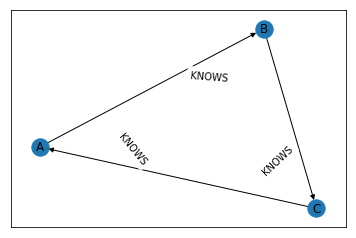

In [6]:
results = %cypher MATCH (s)-[p]-(o) RETURN s, p, o
g = results.get_graph()
nx.draw_networkx(g, labels=dict([(n[0], n[1]['name']) for n in g.nodes(data=True)]))
nx.draw_networkx_edge_labels(g, nx.spring_layout(g), edge_labels=dict([((n[0], n[1]), n[2]['type']) for n in g.edges(data=True)]))